# Machine Learning Workflow: Regression

Let us elevate your knowledge on Machine Learning by getting hands-on experience with Regression task. From the past activities, you learn that classification requires discrete values on targets. In regression, the targets are in continuous values, rather than discrete. There is no changes in the workflow, as shown in the figure below. The only difference is that the new target transitions to different data types, from `int` to `float`.


By the end of this laboratory notebook, you will be able to **implement solutions in any ML regression tasks.**




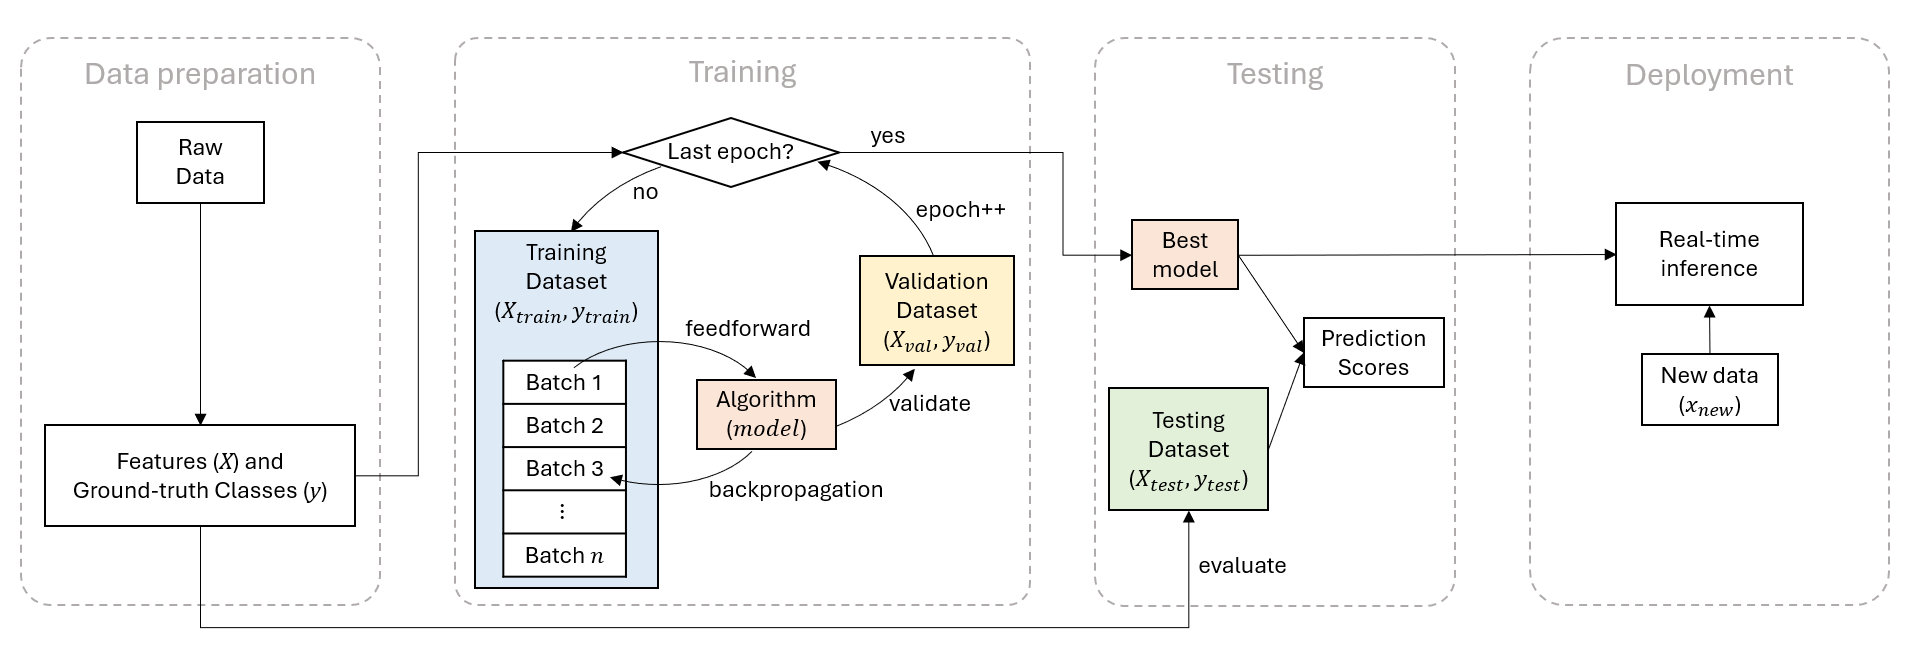

## 1. Data Preparation




You can download the `boston_house.csv` from this [GDrive](https://drive.google.com/file/d/1KEkOfr_ubEL4F-a4zhwGEa9T906hWpim/view?usp=drive_link).

In [27]:
import pandas as pd

try: # if csv file is already in Colab, then load
  raw_data = pd.read_csv("C:/Users/DWIGHT LANCE JUMAOAS/don't open this/emerging_technology/emerging-technologies-main/activities/machine_learning_samples/boston_house.csv")
  print("Loaded boston_house.csv into a DataFrame.")
except FileNotFoundError: # otherwise, allow user to upload the CSV file
  uploaded = files.upload()
  for filename in uploaded.keys():
      raw_data = pd.read_csv(filename)
      print(f"Loaded {filename} into a DataFrame.")

Loaded boston_house.csv into a DataFrame.


Determine the `features` and `ground-truth classes`. Once again, we represent the array of features as the `X` variable, while the ground-truth classes (or the targets) as the `y` variable.

In [28]:
X = raw_data.iloc[:, :-1]
y = raw_data.iloc[:, -1]

Then, you need to perform data splitting: 70% training, 15% validation, and 15% testing.


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_others, y_train, y_others = train_test_split(
    X,  # features
    y,  # targets
    train_size=0.7,  # 70% training set
    shuffle=True,
    random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_others,  # features
    y_others,  # targets
    test_size=0.5,  # 15% = 0.5 of 30%
    shuffle=True,
    random_state=42
)


Alright! So now, you need to remember that:


1.   `X_train` and `y_train` correspond to the features and targets in the training set.
2.   `X_val` and `y_val` correspond to the features and targets in the validation set.
3.   `X_test` and `y_test` correspond to the features and targets in the training set.



## 2. Training

Declare your own ML regression algorithms. Go to [sklearn page](https://scikit-learn.org/stable/supervised_learning.html) for the various options and their documentations.




In [30]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(
    hidden_layer_sizes=(100),     
    max_iter=1000
)



Assign values for `epoch` and `batch size`.


In [31]:
epochs = 500
batch_size = 64

Since we will employ batch processing, you need to re-use the function below to create create batches.

In [32]:
def get_batches(X, y, batch_size):
    for i in range(0, X.shape[0], batch_size):
        X_batch = X[i:i + batch_size]
        y_batch = y[i:i + batch_size]
        yield X_batch, y_batch

Next thing you need to do is to define your own regression loss function. You can optionally call available APIs of different regression loss functions in the sklearn modules. Go to [3.4.1. Scoring parameter](https://scikit-learn.org/stable/modules/model_evaluation.html).

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

You can run the code snippet below to begin the training process. The program might not run, unless you have assigned values for `X_train`, `y_train`, `X_val`, `y_val`, `epochs`, `batch_size`, `model`, and `loss`.

In [34]:
import numpy as np
import copy
from sklearn.metrics import mean_squared_error, r2_score

history = {'train_losses': [], 'val_losses': [], 'best_model': None, 'best_epoch': 0}

for epoch in range(epochs):
    first_batch = True  # reset each epoch

    # --- Train in mini-batches ---
    for X_batch, y_batch in get_batches(X_train, y_train, batch_size):
        y_batch = np.asarray(y_batch)  # convert Series → NumPy array

        if first_batch:
            model.partial_fit(X_batch, y_batch)
            first_batch = False
        else:
            model.partial_fit(X_batch, y_batch)

    # --- Training loss ---
    y_train_pred = model.predict(X_train)
    train_loss = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    # --- Validation loss ---
    y_val_pred = model.predict(X_val)
    val_loss = mean_squared_error(y_val, y_val_pred)
    val_r2 = r2_score(y_val, y_val_pred)

    print(f"Epoch {epoch+1}/{epochs}: train_loss={train_loss:.4f}, val_loss={val_loss:.4f}, ")

    # Save best model (deepcopy to freeze weights)
    if (history['best_model'] is None) or (val_loss < min(history['val_losses'], default=float("inf"))):
        history['best_model'] = copy.deepcopy(model)
        history['best_epoch'] = epoch

    history['train_losses'].append(train_loss)
    history['val_losses'].append(val_loss)


Epoch 1/500: train_loss=3133.2223, val_loss=2837.9623, 
Epoch 2/500: train_loss=221.0568, val_loss=207.8897, 
Epoch 3/500: train_loss=1099.8045, val_loss=1083.3899, 
Epoch 4/500: train_loss=847.4421, val_loss=839.7301, 
Epoch 5/500: train_loss=220.4104, val_loss=214.4502, 
Epoch 6/500: train_loss=219.0620, val_loss=179.1999, 
Epoch 7/500: train_loss=262.3172, val_loss=211.5609, 
Epoch 8/500: train_loss=156.0221, val_loss=125.7099, 
Epoch 9/500: train_loss=131.6918, val_loss=119.5728, 
Epoch 10/500: train_loss=137.2182, val_loss=129.7887, 
Epoch 11/500: train_loss=114.7620, val_loss=102.8376, 
Epoch 12/500: train_loss=107.1282, val_loss=88.9542, 
Epoch 13/500: train_loss=103.1967, val_loss=84.5825, 
Epoch 14/500: train_loss=95.4316, val_loss=81.1174, 
Epoch 15/500: train_loss=91.4210, val_loss=80.5228, 
Epoch 16/500: train_loss=87.3968, val_loss=76.8651, 
Epoch 17/500: train_loss=83.6194, val_loss=72.0377, 
Epoch 18/500: train_loss=80.7307, val_loss=68.9212, 
Epoch 19/500: train_loss=77

Observe the trend of the training and validation losses. Going down together is better!

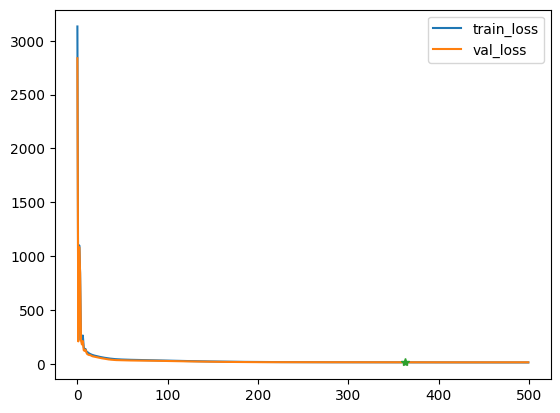

In [35]:
import matplotlib.pyplot as plt

plt.plot(range(epochs), history['train_losses'], label='train_loss')
plt.plot(range(epochs), history['val_losses'], label='val_loss')
plt.plot(history['best_epoch'], history['val_losses'][history['best_epoch']], marker='*')
plt.legend()
plt.show()

**Warning**: The common mistake with programmers is that they forgot to save the model at the best validation loss (minimum val_loss). The `history` variable tracks the best model.

Next step is you validate your model using the validation set through `X_val` and `y_val`. Go to [3.4.4 Regression Metrics](https://scikit-learn.org/stable/modules/model_evaluation.html) and select the metrics that best describe your results.


    MSE:      13.6565
    RMSE:     3.6955
    MAE:      2.6838
    R² Score: 0.8031
    


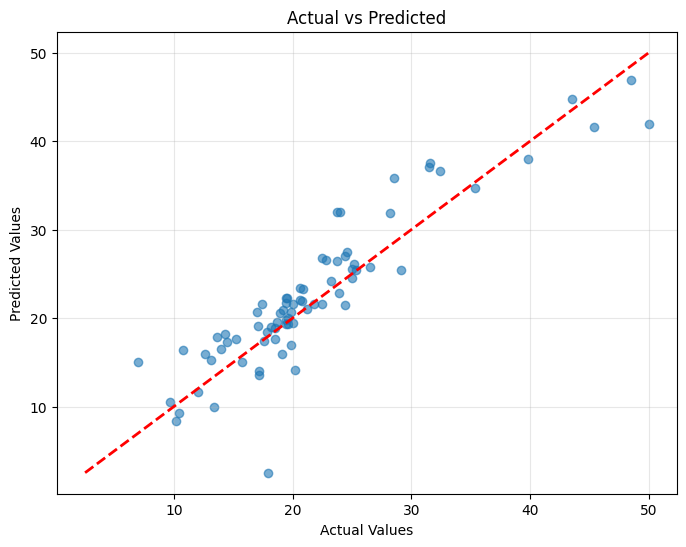

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Simple regression report function
def regression_report(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    report = f"""
    MSE:      {mse:.4f}
    RMSE:     {rmse:.4f}
    MAE:      {mae:.4f}
    R² Score: {r2:.4f}
    """
    return report

# Simple scatter plot function  
def regression_display(y_true, y_pred):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.6)
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted')
    plt.grid(True, alpha=0.3)
    plt.show()

# Your code:
y_val_pred = model.predict(X_val)
print(regression_report(y_val, y_val_pred))
regression_display(y_val, y_val_pred)

## 3. Testing

Apply the same evaluation metrics to testing set (`X_test` and `y_test`).


    MSE:      12.9250
    RMSE:     3.5951
    MAE:      2.4461
    R² Score: 0.8374
    


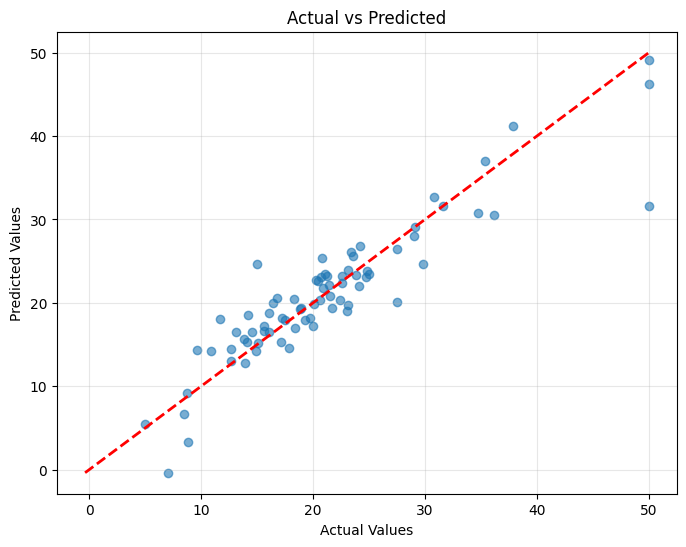

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Simple regression report function
def regression_report(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    report = f"""
    MSE:      {mse:.4f}
    RMSE:     {rmse:.4f}
    MAE:      {mae:.4f}
    R² Score: {r2:.4f}
    """
    return report

# Simple scatter plot function  
def regression_display(y_true, y_pred):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.6)
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted')
    plt.grid(True, alpha=0.3)
    plt.show()
    
y_test_pred = model.predict(X_test)
print(regression_report(y_test, y_test_pred))
regression_display(y_test, y_test_pred)

Note: Do not forget to save your model offline.

In [38]:
import joblib
model_name = "mlp_regressor.pkl"
joblib.dump(model, model_name)

['mlp_regressor.pkl']

In [39]:
# End of laboratory notebook. Nothing follows ...